In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

Загружаем df

In [4]:
games=pd.read_csv('../Lesson1/games.csv')

Отбрасываем NaN values

In [5]:
games=games.dropna()

In [7]:
games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


С помощью метода describe смотрим значения std, mean, percentiles, min, max

In [11]:
games['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

Отдельно применим методы для подсчета мерд центральной тенденции

In [15]:
median = np.median(games.Global_Sales)
mean = np.mean(games.Global_Sales)
mode = scipy.stats.mode(games.Global_Sales)
median1 = games.Global_Sales.median()
mode1 = games.Global_Sales.mode()
mean1 = games.Global_Sales.mean()

/var/folders/k4/7gf3j58n5lv2x48dmlq18xm80000gn/T/ipykernel_77913/4242015516.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(games.Global_Sales)


In [35]:
print('numpy.median = {}'.format(median1), '\nnumpy.mean = {}'.format(mean), '\nscipy.mode = {}'.format(mode))
print(f"\npandas.mean = {mean1} \npandas.mode = {mode1} \npandas.median = {median1}")

numpy.median = 0.17 
numpy.mean = 0.5409103185808628 
scipy.mode = ModeResult(mode=array([0.02]), count=array([1045]))

pandas.mean = 0.5409103185808628 
pandas.mode = 0    0.02
Name: Global_Sales, dtype: float64 
pandas.median = 0.17


In [37]:
np.percentile(games.Global_Sales, [25, 50, 75])

array([0.06, 0.17, 0.48])

Посчитаем дисперсию Global_Sales

In [91]:
games.Global_Sales.var()

2.4565688029452266

Посчитаем количество вышедших игр в каждом году и построим распределение значений признака Year

In [39]:
year_bar_plot = games \
    .groupby(['Year'], as_index = False) \
    .agg({'Name':'count'})

In [42]:
year_bar_plot.head(3)

,Year,Name
0,1980.0,9
1,1981.0,46
2,1982.0,36


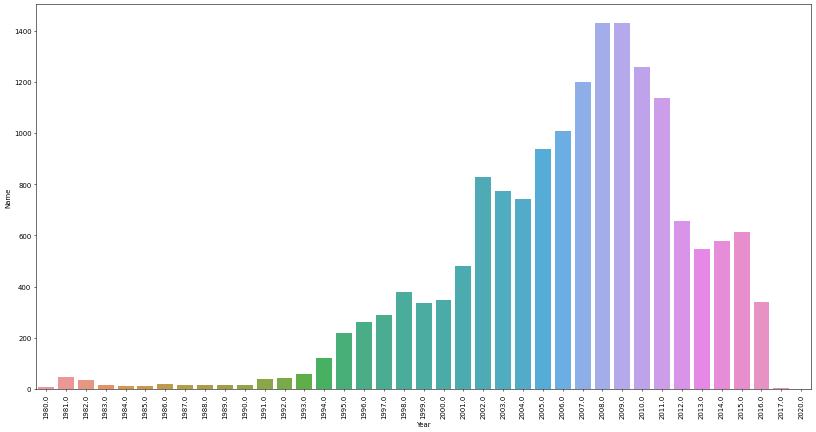

In [52]:
plt.figure(figsize=(20,10), dpi=50)
plt.xticks(rotation=90)
sns.despine
sns.barplot(data=year_bar_plot, x='Year', y='Name')
plt.show()

Можно посчитать без группировки (countplot)

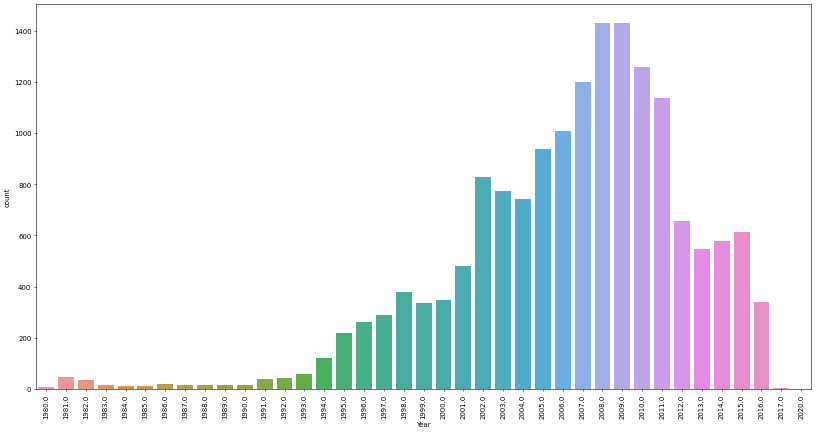

In [56]:
plt.figure(figsize=(20,10), dpi=50)
plt.xticks(rotation=90)
sns.despine 
sns.countplot(data = games, x = 'Year')
plt.show()

In [9]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Посчитаем процент выпущенных игр по платформам

In [62]:
p = games.Platform.value_counts(normalize=True)*100

In [69]:
p

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: Platform, dtype: float64

Преобразуем pandas series в df

In [70]:
p = pd.DataFrame(data=p).sort_values('Platform', ascending=False).query('Platform > 7')

In [71]:
p

,Platform
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508


Посчитаем меры центральной тенденции по платформе Nintendo для признака Global_Sales

In [73]:
games[games.Publisher == 'Nintendo'].Global_Sales.mean()

2.563836206896549

In [74]:
games[games.Publisher == 'Nintendo'].Global_Sales.median()

0.92

In [75]:
games[games.Publisher == 'Nintendo'].Global_Sales.std()

5.676924572378196

In [76]:
games[games.Publisher == 'Nintendo'].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


Построим боксплоты по значениям признака JP_Sales платформы nintendo в разрезе жанров

In [82]:
games_nintendo_geners = games[games.Publisher == 'Nintendo']

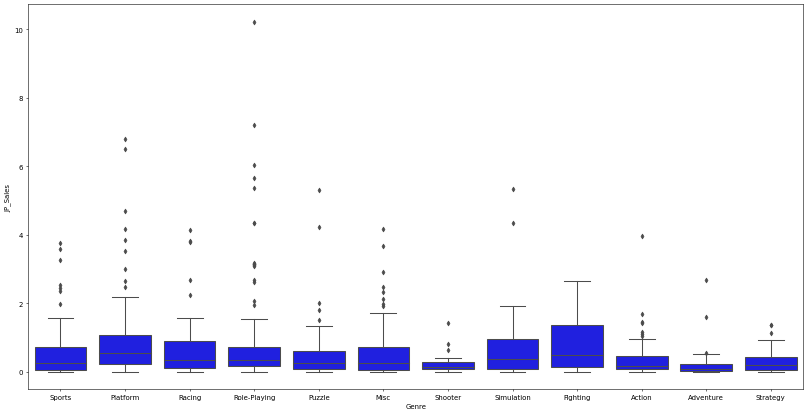

In [83]:
plt.figure(figsize = (20,10), dpi = 50)
sns.boxplot(data=games_nintendo_geners, x='Genre', y='JP_Sales', color='blue')
plt.show()

Посчитаем количество игр (платформа nintendo) по годам и жанрам и построим lineplot, чтобы посмотреть в какие года был всплеск по выпуску игр определенного жанра

In [88]:
games_nintendo_geners_year = games_nintendo_geners \
    .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
    .groupby(['Genre', 'Year'], as_index=False) \
    .agg({'Name':'count'})

In [89]:
games_nintendo_geners_year.head(3)

,Genre,Year,Name
0,Fighting,1987.0,2
1,Fighting,1993.0,1
2,Fighting,1995.0,1


<AxesSubplot:xlabel='Year', ylabel='Name'>

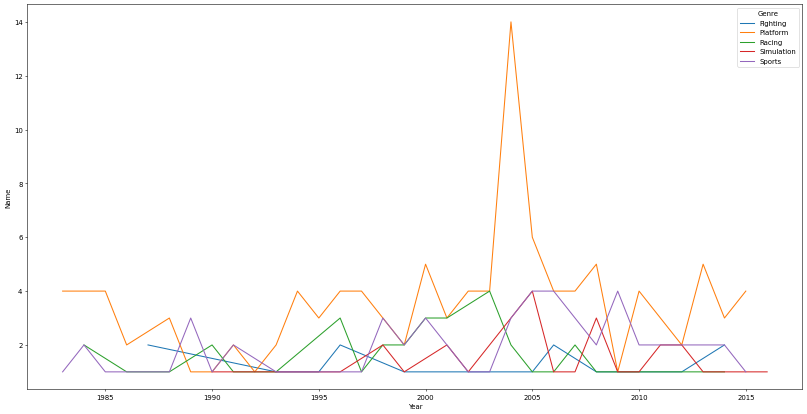

In [90]:
plt.figure(figsize=(20,10), dpi = 50)
sns.lineplot(data=games_nintendo_geners_year, x='Year', y='Name', hue='Genre')